# Introduçao ao Tensorflow

Neste tutorial criaremos um modelo de rede neural para **classificação de imagens de roupas**, como por exemplo tênis e camisetas.

Na sequência, veremos como:

1. Criar uma rede neural para classificação de imagens.
2. Treinar essa rede neural.
3. E, finalmente, avaliar o desempenho da rede.

## Tensorflow

TensorFlow é uma biblioteca de código aberto criada em 2015 pelo Google para aprendizado de máquina.

Ela se tornou rapidamente uma das principais ferramentas para criação de redes neurais profundas, em inglês *deep learning*.

O Tensorflow oferece **suporte a GPUs**, o que torna o **treinamento** de modelos de redes neurais **muito mais rápido**.

Além disso, ela é utilizada para o **desenvolvimento** de aplicações de IA em **larga escala**.

Entretanto, a API nativa do Tensorflow apresenta um **alto grau de flexibilidade** para a criação de redes neurais, o que **exige um conhecimento avançado** delas e de como configurá-las.

## Keras

+ É uma **API de alto nível** executada sobre o TensorFlow (e sobre outras bibliotecas de ML como a Theano) que possibilita a criação simples e rápida de redes neurais.
    + Ou seja, possibilita a prototipagem rápida de redes neurais.


<img src="https://github.com/zz4fap/t320_aprendizado_de_maquina/blob/main/figures/keras.png?raw=1" width="300px">

+ Portanto, o Keras facilita uso do Tensorflow em detrimento de uma menor flexibilidade.

+ Assim, neste tutorial usaremos o Keras para construir e treinar modelos de redes neurais que executem sobre o TensorFlow.

## Importe as bibliotecas necessárias.

+ A forma mais simples de se instalar o tensorflow é através da interface gráfica da distribuição Anaconda.

+ Ela também pode ser instalada via linha de comando com o gerenciador de pacotes `pip`:
```bash
pip install tensorflow
```

In [ ]:
# TensorFlow
import tensorflow as tf

# Bibliotecas Auxiliares
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

print(tf.__version__)

2.10.1


## Importe a base de dados Fashion MNIST

Esse tutorial usa a base de dados [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) que contém 70.000 imagens em tons de cinza divididas em 10 categorias (ou classes).

As imagens mostram **peças de roupa** com baixa resolução (28 por 28 pixels), como vemos abaixo.

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Amostras de Fashion-MNIST</a> (por Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Usaremos 60.000 imagens para treinar nossa rede neural e 10.000 imagens para avaliar quão precisamente nossa rede aprendeu a classificar as imagens.

Nós podemos acessar a base de dados *Fashion MNIST* diretamente do TensorFlow através da função `fashion_mnist.load_data()` do módulo `datasets`.

Importe e carregue a base Fashion MNIST diretamente do TensorFlow:

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

A função `fashion_mnist.load_data()` retorna quatro arrays NumPy:

* As *arrays* `train_images` e `train_labels` formam o *conjunto de treinamento*.
* As *arrays* `test_images` e `test_labels` formam o *conjunto de validação*.

As imagens são arrays NumPy de dimensão $28 \times 28$ pixels. Os pixels têm valores inteiros entre 0 to 255. Os rótulos (i.e., *labels*) estão em uma array de inteiros e estão no intervalo de 0 a 9.

O número do rótulo corresponde à classe de roupa que cada imagem representa:

<table>
  <tr>
    <th>Label</th>
    <th>Classe</th>
  </tr>
  <tr>
    <td>0</td>
    <td>Camisetas/Top (T-shirt/top)</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Calça (Trouser)</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Suéter (Pullover)</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Vestidos (Dress)</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Casaco (Coat)</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandálias (Sandal)</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Camisas (Shirt)</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Tênis (Sneaker)</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bolsa (Bag)</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Botas (Ankle boot)</td>
  </tr>
</table>

Cada imagem contém um único objeto (i.e., uma peça de roupa) e, portanto, é mapeada em um só *rótulo*.

Já que o *nome das classes* não estão incluídas na base de dados. Portanto, armazenamos os nomes em uma lista para usá-los mais tarde quando plotarmos as imagens.

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore os dados

Vamos explorar o formato da base de dados antes de treinar o modelo.

O próximo comando mostra que existem 60.000 imagens no conjunto de treinamento e cada imagem é representada por $28 \times 28$ pixels:

In [ ]:
train_images.shape

(60000, 28, 28)

Do mesmo modo, existem 60.000 labels no conjunto de treinamento:

In [ ]:
len(train_labels)

60000

Cada label é um valor inteiro entre 0 e 9:

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Existem 10.000 imagens no conjunto de validação. Novamente, cada imagem é representada por uma array com $28 \times 28$ pixels:

In [ ]:
test_images.shape

(10000, 28, 28)

Do mesmo modo, existem 10.000 labels no conjunto de validação:

In [ ]:
len(test_labels)

10000

## Pré-processamento dos dados

Os dados precisam ser pré-processados antes de treinar a rede.

Se inspecionarmos a primeira imagem do conjunto de treinamento, veremos que os valores dos pixels são valores interios no intervalo 0 a 255:

In [ ]:
train_images.dtype

dtype('uint8')

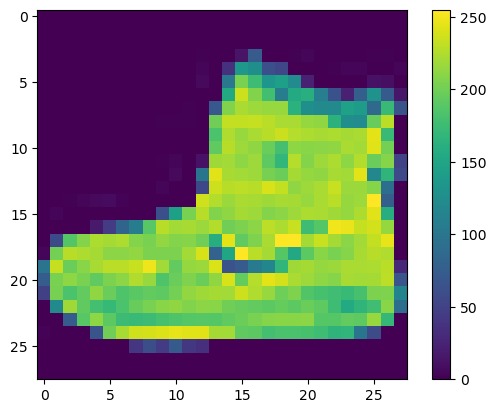

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Portanto, para **melhorar a estabilidade** do treinamento e **aumentar a velocidade de convergência**, nós normalizamos os valores das imagens.

Normalizamos os valores dos pixels de forma que fiquem no intervalo entre 0 e 1 antes de alimentar o modelo da rede neural. Para fazer isso, dividimos os valores por 255.

É importante que o **conjunto de treinamento** e o **conjunto de validação** sejam pré-processados do mesmo modo:

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Depois da divisão por 255.0, o tipo dos pixels passa a ser float.

In [ ]:
train_images.dtype

dtype('float64')

Para verificar que os dados estão no formato correto e que estamos prontos para construir e treinar a rede neural, vamos plotar as primeiras 25 imagens do *conjunto de treinamento* e mostrar o nome das classes de cada imagem.

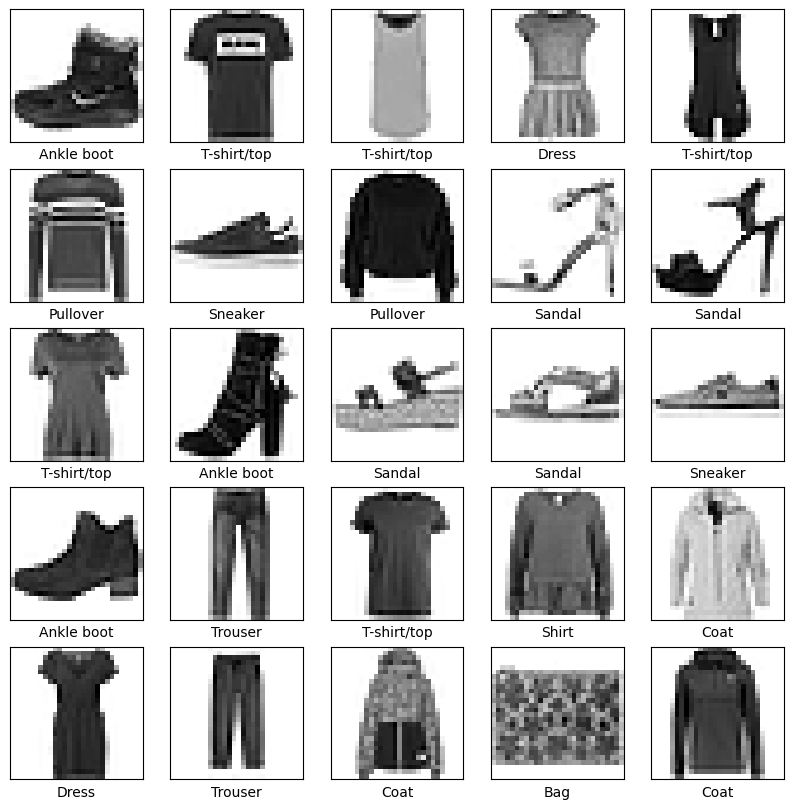

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Construindo o modelo

A construção da rede neural requer

1.   Criar e configurar as camadas do modelo,
2.   e depois, compilar o modelo.

### Montar as camadas

O principal bloco de construção de uma rede neural é a camada (*layer*).

Neste exemplo, usaremos camadas da classe `tf.keras.layers.Dense`. Essas camadas são totalmente conectadas, ou seja, as saídas da camada anterior se conectam a todos os nós da camada.

A ideia é que as camadas vão extraindo representações dos dados de entrada da rede. Com sorte, essas representações serão significativas o suficiente para que ela classifique os dados de entrada.

Nas redes de alimentação direta (*feed-forward*), como as Multi-Layer Perception, temos sequências de camadas que vão extraindo as informações dos dados de entrada.

Portanto, o que vamos fazer é **sequencializar** (ou empilhar) várias camadas.

Nós sequencializamos um grupo de camadas com um objeto da classe `keras.Sequential`.

Essa classe é apropriada para empilhar camadas, onde camada camada tem exatamente um **tensor** de entrada e um tensor de saída.

+ Um **tensor** é uma generalização de vetores e matrizes e é facilmente entendido como uma array multidimensional.

In [ ]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ]
)

A primeira camada da rede, `tf.keras.layers.Flatten`, transforma o formato da imagem de uma array com duas dimensões (28 por 28 pixels) em uma array unidimensional com 784 pixels (i.e., 28 * 28 = 784 pixels).



Essa camada não tem parâmetros a serem aprendidos durante o treinamento, ela só redimensiona os dados de entrada. Como o próprio nome diz, ela **achata** os dados de entrada.


Por ser a primeira camada da rede neural, devemos definir o parâmetro `input_shape`, o qual define as dimensões dos exemplos de entrada da rede.


Depois dos pixels serem achatados, a rede consiste de uma sequência de duas camadas do tipo `tf.keras.layers.Dense`. Essas são camadas chamadas de densamente ou totalmente conectadas. Isso significa que todos os sinais de entrada de uma camada são conectados a todos os nós (ou neurônios) daquela camada.



A primeira camada `Dense`, que é única camada oculta desta rede, tem 128 nós e usa a função de ativação **relu** em todos seus nós.



A segunda camada `Dense`, que é a camada de saída, tem 10 nós, pois temos 10 classes, usa uma função de ativação **softmax** e retorna uma array de 10 probabilidades.
    
+ Cada nó de saída da rede gera um valor que indica a probabilidade (ou **confiança**) de que aquela imagem de entrada pertença a uma das 10 classes. A soma das 10 probabilidades sempre resulta em 1 (propriedade da distribuição multinomial).


## Compilando o modelo

Antes do modelo ser treinado, é necessário configurar alguns parâmetros necessários para o seu treinamento. Essa configuração é feita durante a etapa de **compilação** do modelo:

* *loss*: define a **função de custo** a ser minimizada durante o processo de aprendizado. O objetivo é encontrar o conjunto de pesos que minimize essa função. A função de custo `sparse_categorical_crossentropy` calcula a entropia cruzada entre os rótulos e as predições feitas pela rede.


* *optimizer*: define o algoritmo usado para atualizar os pesos da rede neural com base no conjunto de treinamento e na função de custo. Podemos usar o gradiente descendente estocástico (GDE) ou uma de suas várias versões, como o `Adam`, que é uma versão com ajuste adaptativo do passo de aprendizagem.



* *metrics*: definimos as métricas usadas para monitorar o treinamento e validação do modelo. O exemplo abaixo usa a **acurácia** como métrica. Passamos uma lista, pois podemos definir mais de uma métrica a ser monitorada.

In [ ]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

## Treinando o modelo

Para treinar, usamos o método `fit`.


O modelo é treinado por 25 épocas com o conjunto de treinamento, ou seja, `train_images` e `train_labels`. O número de épocas é configurado através do parâmetro `epochs`.


O modelo é treinado usando **mini-batches** de tamanho igual a 32 exemplos, que é o valor padrão do parâmetro `batch_size` do método `fit`.


O método `fit` retorna um objeto do tipo `History` que contém um **dicionário** com o **histórico de valores da função de custo e da acurácia** ao longo das épocas de treinamento.

In [ ]:
history = model.fit(train_images, train_labels, epochs=25)

Epoch 1/25
1875/1875 [==============================] - 4s 1ms/step - loss: 0.5060 - accuracy: 0.8221
Epoch 2/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3750 - accuracy: 0.8641
Epoch 3/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3378 - accuracy: 0.8774
Epoch 4/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3146 - accuracy: 0.8835
Epoch 5/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2955 - accuracy: 0.8898
Epoch 6/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2800 - accuracy: 0.8967
Epoch 7/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2682 - accuracy: 0.8990
Epoch 8/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2568 - accuracy: 0.9040
Epoch 9/25
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2493 - accuracy: 0.9057
Epoch 10/25
1875/1875 [==============================] - 2s 1ms/step - loss: 0.242

À medida que o modelo treina, as métricas **loss** e **acurácia** de treinamento são mostradas.


O modelo atinge uma acurácia de aproximadamente 94% com o conjunto de treinamento.

### Desempenho do modelo ao longo do treinamento

Usamos as informações contidas no objeto do tipo `History` para plotar uma figura do erro/acurácia em função das épocas de treinamento.

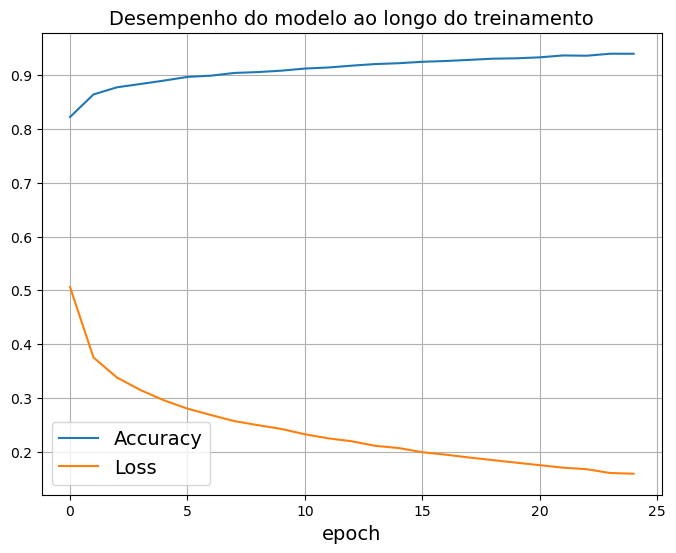

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.xlabel('epoch', fontsize=14)
plt.legend(['Accuracy', 'Loss'], fontsize=14)
plt.title('Desempenho do modelo ao longo do treinamento', fontsize=14)
plt.grid()
plt.show()

## Avaliando a acurácia

Em seguida, verificamos o desempenho do modelo no conjunto de validação.


Para avaliar o desempenho, usamos o método `evaluate` da classe `Model` passando as imagens e rótulos de validação.

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3713 - accuracy: 0.8923 - 385ms/epoch - 1ms/step

Test accuracy: 0.892300009727478


A acurácia com o conjunto de validação é um pouco menor do que a acurácia com o conjunto de treinamento.

Essa diferença entre as duas acurácias representa um pequeno **sobreajuste**, em inglês, *overfitting*, do modelo no conjunto de treinamento.

## Fazendo predições

Usaremos o modelo treinado para realizar algumas predições de exemplos do conjunto de validação.


Para realizar predições, usamos o método `predict` da classe `Model`.

In [ ]:
predictions = model.predict(test_images)

313/313 [==============================] - 0s 788us/step


O modelo faz a predição para cada imagem no conjunto de validação e as atribuiu à variável `predictions`.

Vamos verificar as dimensões desta variável.

In [ ]:
predictions.shape

(10000, 10)

Essas dimensões significam que temos para cada uma das 10.000 imagens, 10 valores de probabilidade, um valor para cada uma das 10 possíveis classes a que podem pertencer as imagens.


Vamos olhar a saída para a primeira predição:

In [ ]:
predictions[0]

array([1.0660198e-15, 3.9534358e-16, 1.7226473e-16, 1.7106225e-18,
       4.8909427e-14, 5.1724967e-08, 1.7350524e-16, 8.6410277e-05,
       1.2569285e-12, 9.9991357e-01], dtype=float32)

Como vemos acima, a predição para cada imagem é uma array com 10 valores.

Cada valor representa a **confiança** (ou probabilidade) do modelo que a imagem pertença a cada uma das diferentes classes de roupa.

Com a função `np.argmax`, podemos verificar qual classe, ou seja, o índice, tem a maior **probabilidade**.

In [ ]:
np.argmax(predictions[0])

9

Então, o modelo está bastante confiante de que essa imagem é uma **bota**.

Examinando os rótulos de validação, vemos que essa classificação está correta:

In [ ]:
test_labels[0]

9

## Plotando a matriz de confusão

Plotamos a matriz de confusão para o conjunto de validação.

313/313 [==============================] - 0s 808us/step


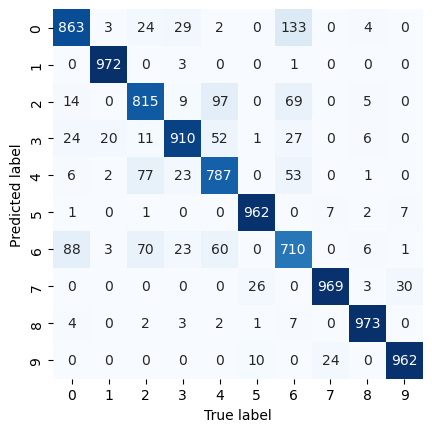

In [ ]:
# Predict.
y_pred = np.argmax(model.predict(test_images), axis=1)

# Plot the confusion matrix.
mat = confusion_matrix(test_labels, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=range(10), yticklabels=range(10), cmap="Blues")
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()

Percebam que o modelo se confunde com algumas classes. O principal motivo é a semelhança entre algumas delas e, claro, a baixa qualidade das imagens.

Dois exemplos claros são

+ Peças de roupa da classe 0 (Camisetas) sendo incorretamente classificadas como pertencentes à classe 6 (Camisas).
+ Peças de roupa da classe 4 (Casacos) sendo incorretamente classificadas como pertencentes à classe 2 (Suéters).

## Usando uma GPU

O treinamento que fizemos acima foi feito usando CPUs.


Como esta é uma rede pequena, ela pode ser facilmente treinada em CPUs, mas conforme a rede se torna maior (i.e., mais camadas) e o conjunto de treinamento muito grande, a complexidade computacional necessária para o seu treinamento aumenta e, nesses casos, deve-se usar GPUs.


Assim, para acelerar o treinamento de modelos muito grande e com bases de dados muito grandes, podemos habilitar o uso de GPUs no Colab através do menu **Editar** e, em seguida, **Configurações de notebook**.

## Tarefa

**OBS.: Este laboratório é opcional. Ele não faz parte dos 15% da nota de atividades, mas vale pontos extras.**

1. <span style="color:blue">**Laboratório #9 - Tensorflow**</span>: cliquem no link abaixo para accessar os exercícios do laboratório #9.

[![Google Colab](https://badgen.net/badge/Launch/on%20Google%20Colab/blue?icon=terminal)](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/labs/Laboratorio9.ipynb)